# Parameter Estimation for Energy Model of EGFR Pathway

In [1]:
import petab
import fides
import os
import libsbml
import amici
import amici.petab_simulate
import matplotlib.pyplot as plt
import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import petab.visualize
import pypesto.visualize as visualize
from petab.visualize import plot_data_and_simulation
from petab.visualize import plot_petab_problem
import importlib
import sys

In [ ]:
# import to petab
petab_problem = petab.Problem.from_yaml(
    
   "EGFR/EGFR.yaml"    #state the exact folder contains the yaml file
)
importer = pypesto.petab.PetabImporter(petab_problem)
# import to pypesto
problem = importer.create_problem()
model = importer.create_model(verbose=False)


In [ ]:

# create optimizer object which contains all information for doing the optimization
options = {'maxiter':2000}
optimizer = optimize.FidesOptimizer(options=options)
#optimizer = optimize.PyswarmOptimizer(options=options)
#optimizer = optimize.ScipyOptimizer()
#engine = pypesto.engine.SingleCoreEngine()
engine = pypesto.engine.MultiProcessEngine()

# do the optimization
result = optimize.minimize(
    problem=problem, optimizer=optimizer, n_starts=10, engine=engine
)


# Visualization

<AxesSubplot:title={'center':'Estimated parameters'}, xlabel='Parameter value', ylabel='Parameter'>

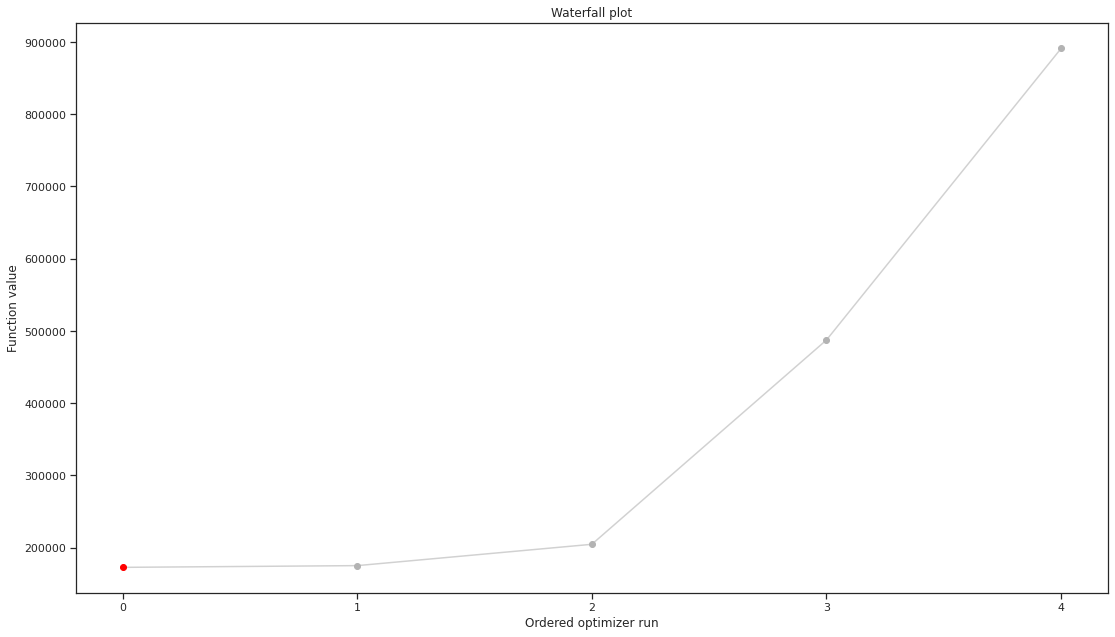

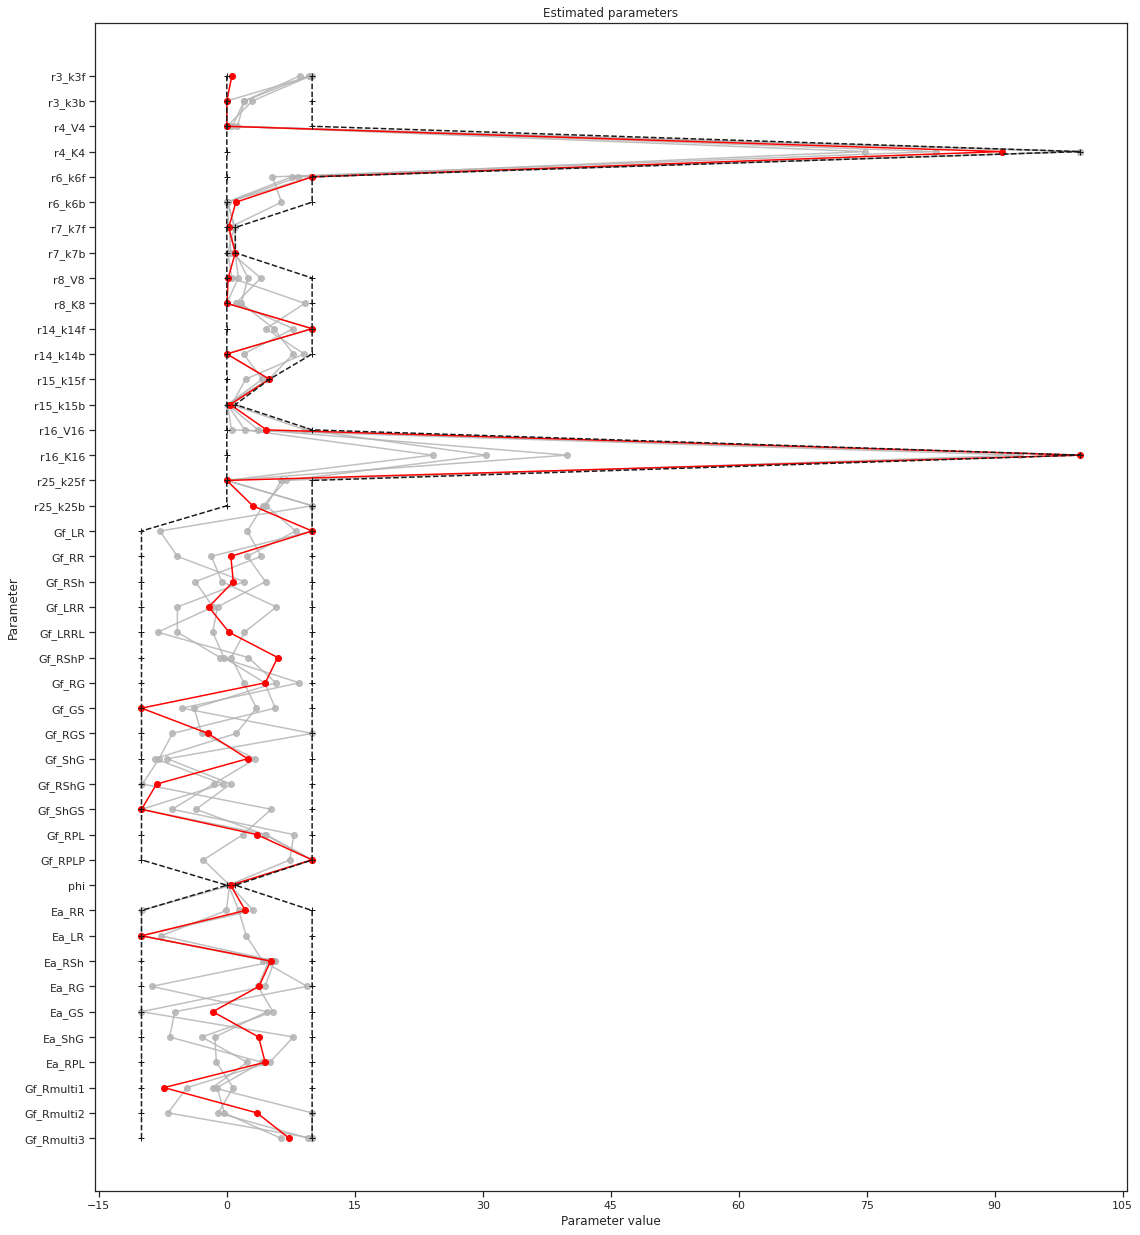

In [9]:
visualize.waterfall(result, scale_y="lin")
visualize.parameters(result)

2022-07-21 21:34:26.609 - amici.petab_import - INFO - Successfully loaded model EBM_EStimatedParam_rmulti from /home/zarifeh/Downloads/Energy Modeling/Enery Model EGFR ParameterEStimation_Step5/amici_models/EBM_EStimatedParam_rmulti.


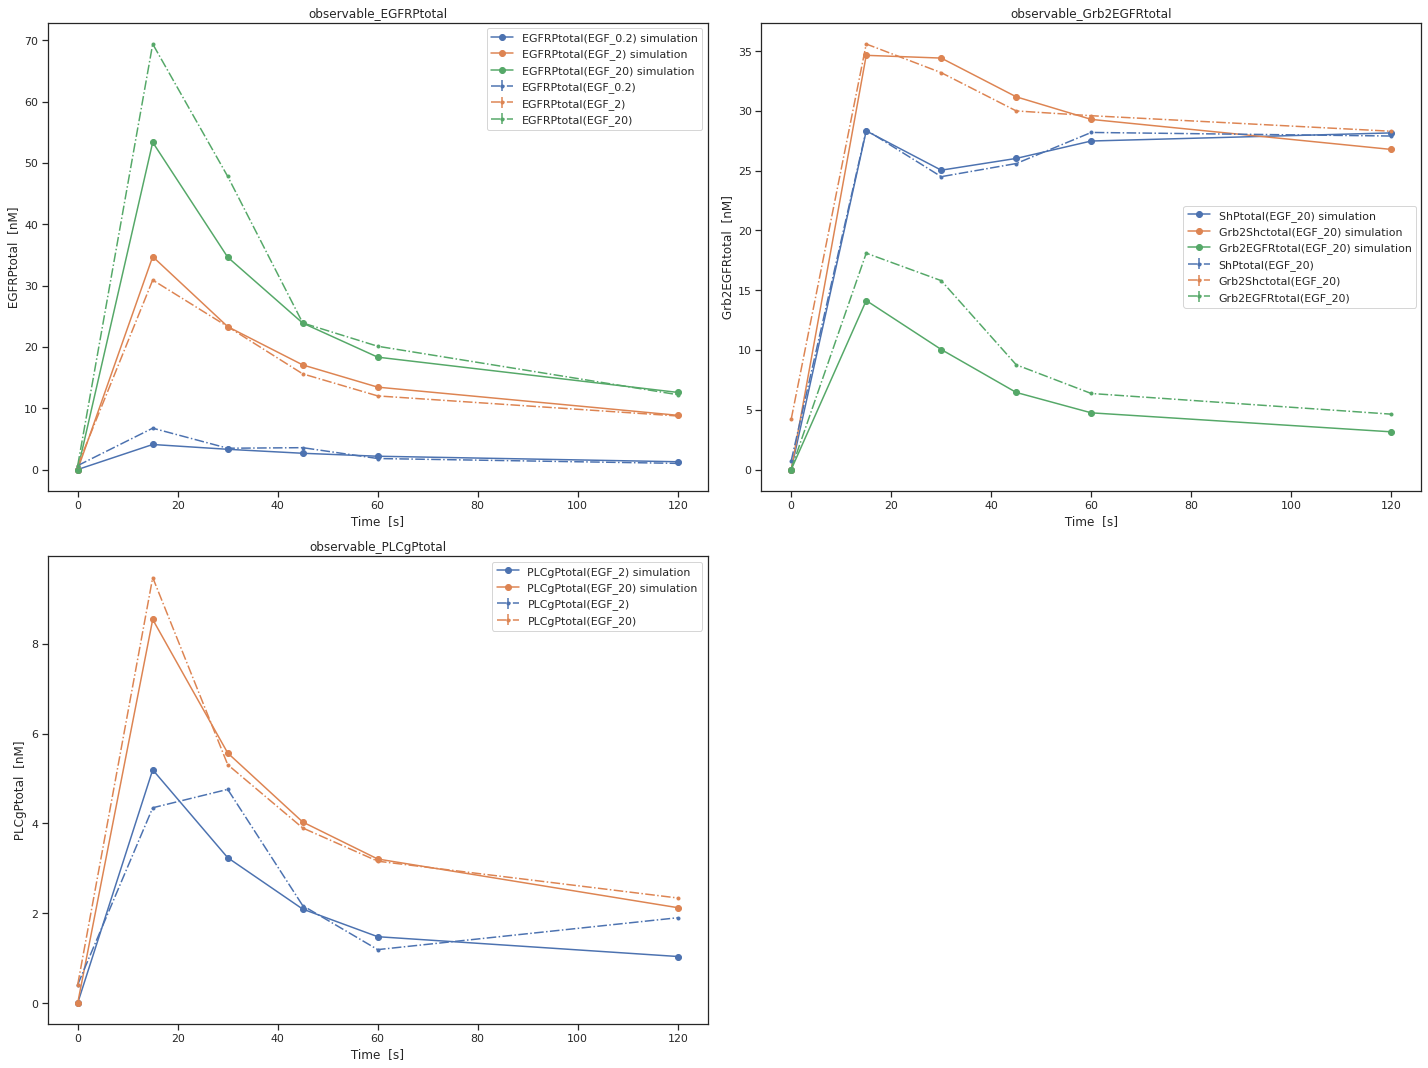

In [10]:
from pypesto.visualize.model_fit import visualize_optimized_model_fit

pp1=visualize_optimized_model_fit(petab_problem=petab_problem, result=result)

In [11]:
def get_x_mle(optimize_result, pypesto_problem, petab_problem, scaled=True):
    if not scaled:
        scaling = petab.parameters.get_optimization_parameter_scaling(
            petab_problem.parameter_df
        )
    return {
        x_id: (
            petab.parameters.unscale(x_value, scaling[x_id])
            if not scaled
            else x_value
        )
        for x_id, x_value in zip(
            pypesto_problem.x_names, optimize_result.list[0]["x"]
        )
        # if x_id in scaling
    }
x_mle_unscaled_original = get_x_mle(
    result.optimize_result,
    problem,
    petab_problem,
    scaled=False,
)
print("Parameters are estimated to be (linear scale):")
print(
    "\n".join(
        [
            f"{x_id}: {x_value}"
            for x_id, x_value in x_mle_unscaled_original.items()
        ]
    )
)

import libsbml

converter_config = libsbml.SBMLLocalParameterConverter().getDefaultProperties()
petab_problem.sbml_document.convert(converter_config)

obj = importer.create_objective()
ref = visualize.create_references(
    x=petab_problem.x_nominal_scaled, fval=obj(petab_problem.x_nominal_scaled)
)


Using existing amici model in folder /home/zarifeh/Downloads/Energy Modeling/Enery Model EGFR ParameterEStimation_Step5/amici_models/EBM_EStimatedParam_rmulti.


Parameters are estimated to be (linear scale):
r3_k3f: 0.596048791286383
r3_k3b: 1.0000000016687578e-05
r4_V4: 1.000000001668322e-05
r4_K4: 90.80730342162988
r6_k6f: 9.999999999999984
r6_k6b: 1.0645273673767899
r7_k7f: 0.22787466656335487
r7_k7b: 0.9999999999999832
r8_V8: 0.1546203704959493
r8_K8: 0.022304437544191986
r14_k14f: 9.999999999999984
r14_k14b: 1.000000001685889e-05
r15_k15f: 4.999999999999979
r15_k15b: 0.39805840543588844
r16_V16: 4.64927698800091
r16_K16: 99.99999999999997
r25_k25f: 1.000000001677165e-05
r25_k25b: 3.035521314067513
Gf_LR: 9.999999999999984
Gf_RR: 0.4762143599379086
Gf_RSh: 0.7563199502128524
Gf_LRR: -2.11183173759465
Gf_LRRL: 0.254795242746467
Gf_RShP: 5.961961579236839
Gf_RG: 4.507478998617911
Gf_GS: -9.999999999999984
Gf_RGS: -2.218578742798741
Gf_ShG: 2.435959052539623
Gf_RShG: -8.225278277660257
Gf_ShGS: -9.999999999999984
Gf_RPL: 3.5299588700740983
Gf_RPLP: 9.999999999999982
phi: 0.4409282501581756
Ea_RR: 2.1674611759896143
Ea_LR: -9.99999999999998
Ea

# Sampling

To evaluate the convergence of MCMC chains it is helpful to create multiple chains that have different starting values. 

In [13]:
import pypesto.sample as sample
sampler = sample.AdaptiveParallelTemperingSampler(
   internal_sampler=sample.AdaptiveMetropolisSampler(), n_chains=2)

#sampler = sample.AdaptiveMetropolisSampler()

result = sample.sample(
    problem, n_samples=10000, sampler=sampler, result=result, filename=None
)


100%|██████████| 10000/10000 [25:30<00:00,  6.53it/s] 
Elapsed time: 7754.009975954001


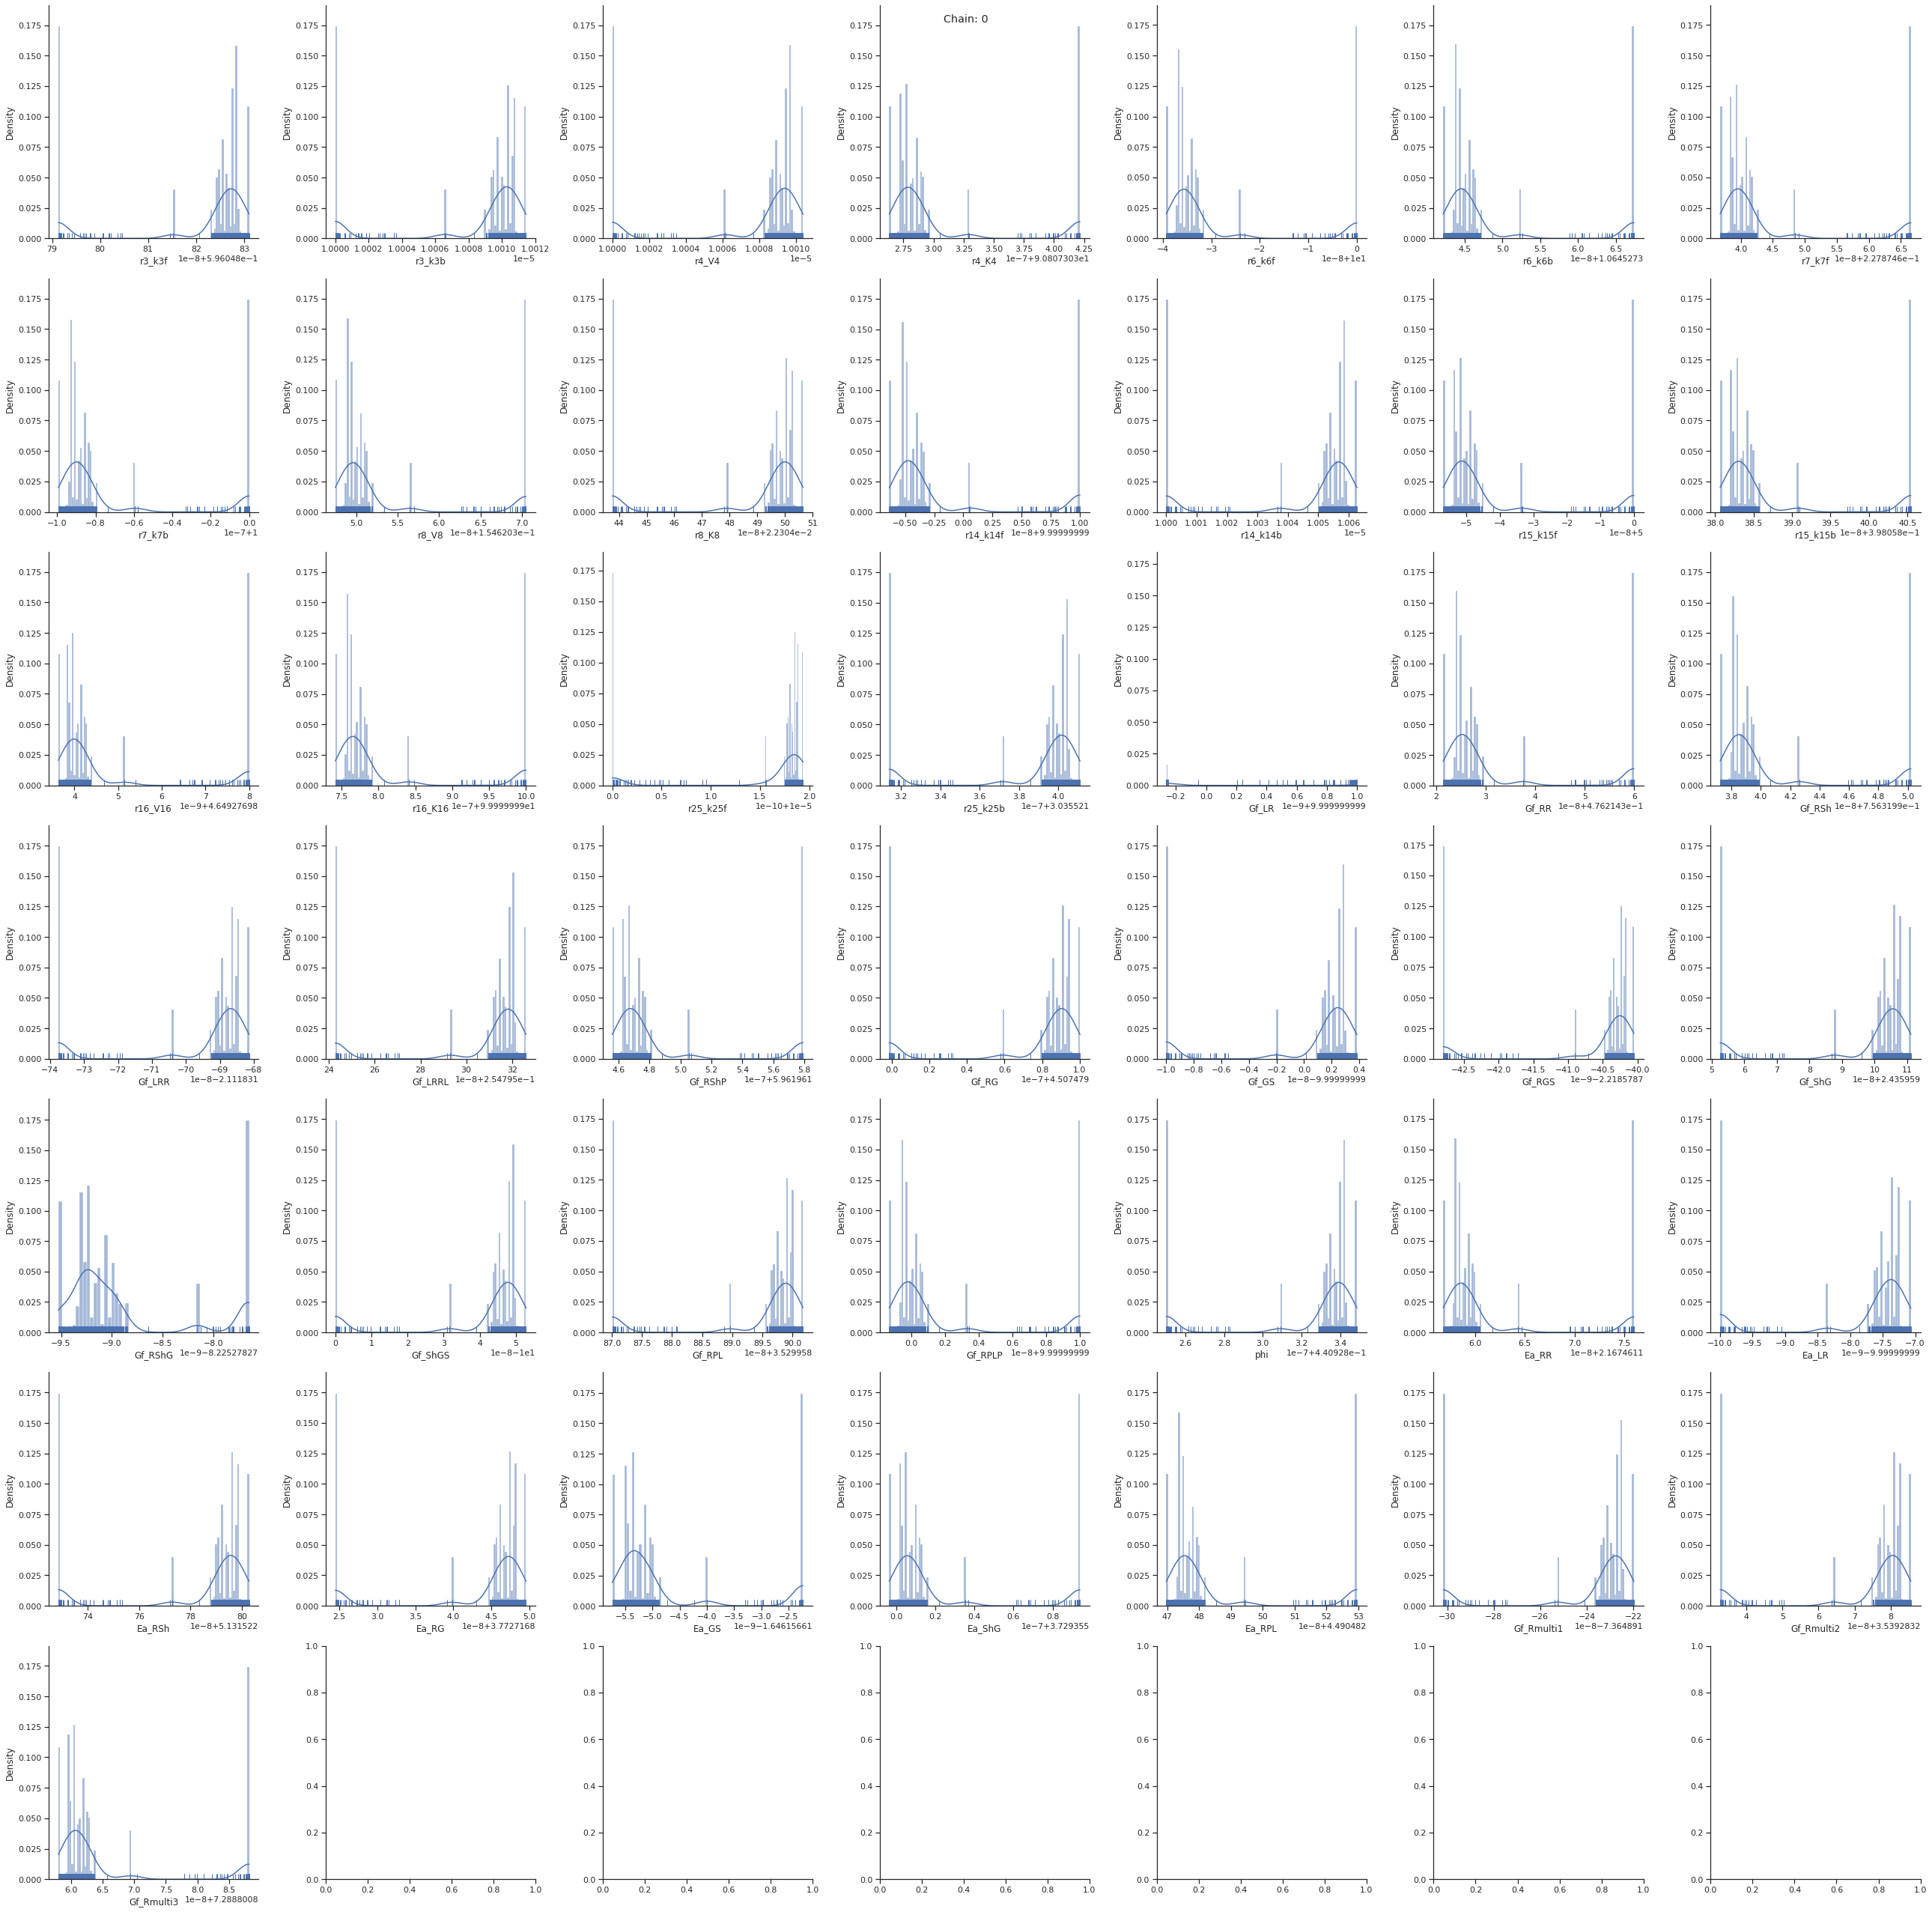

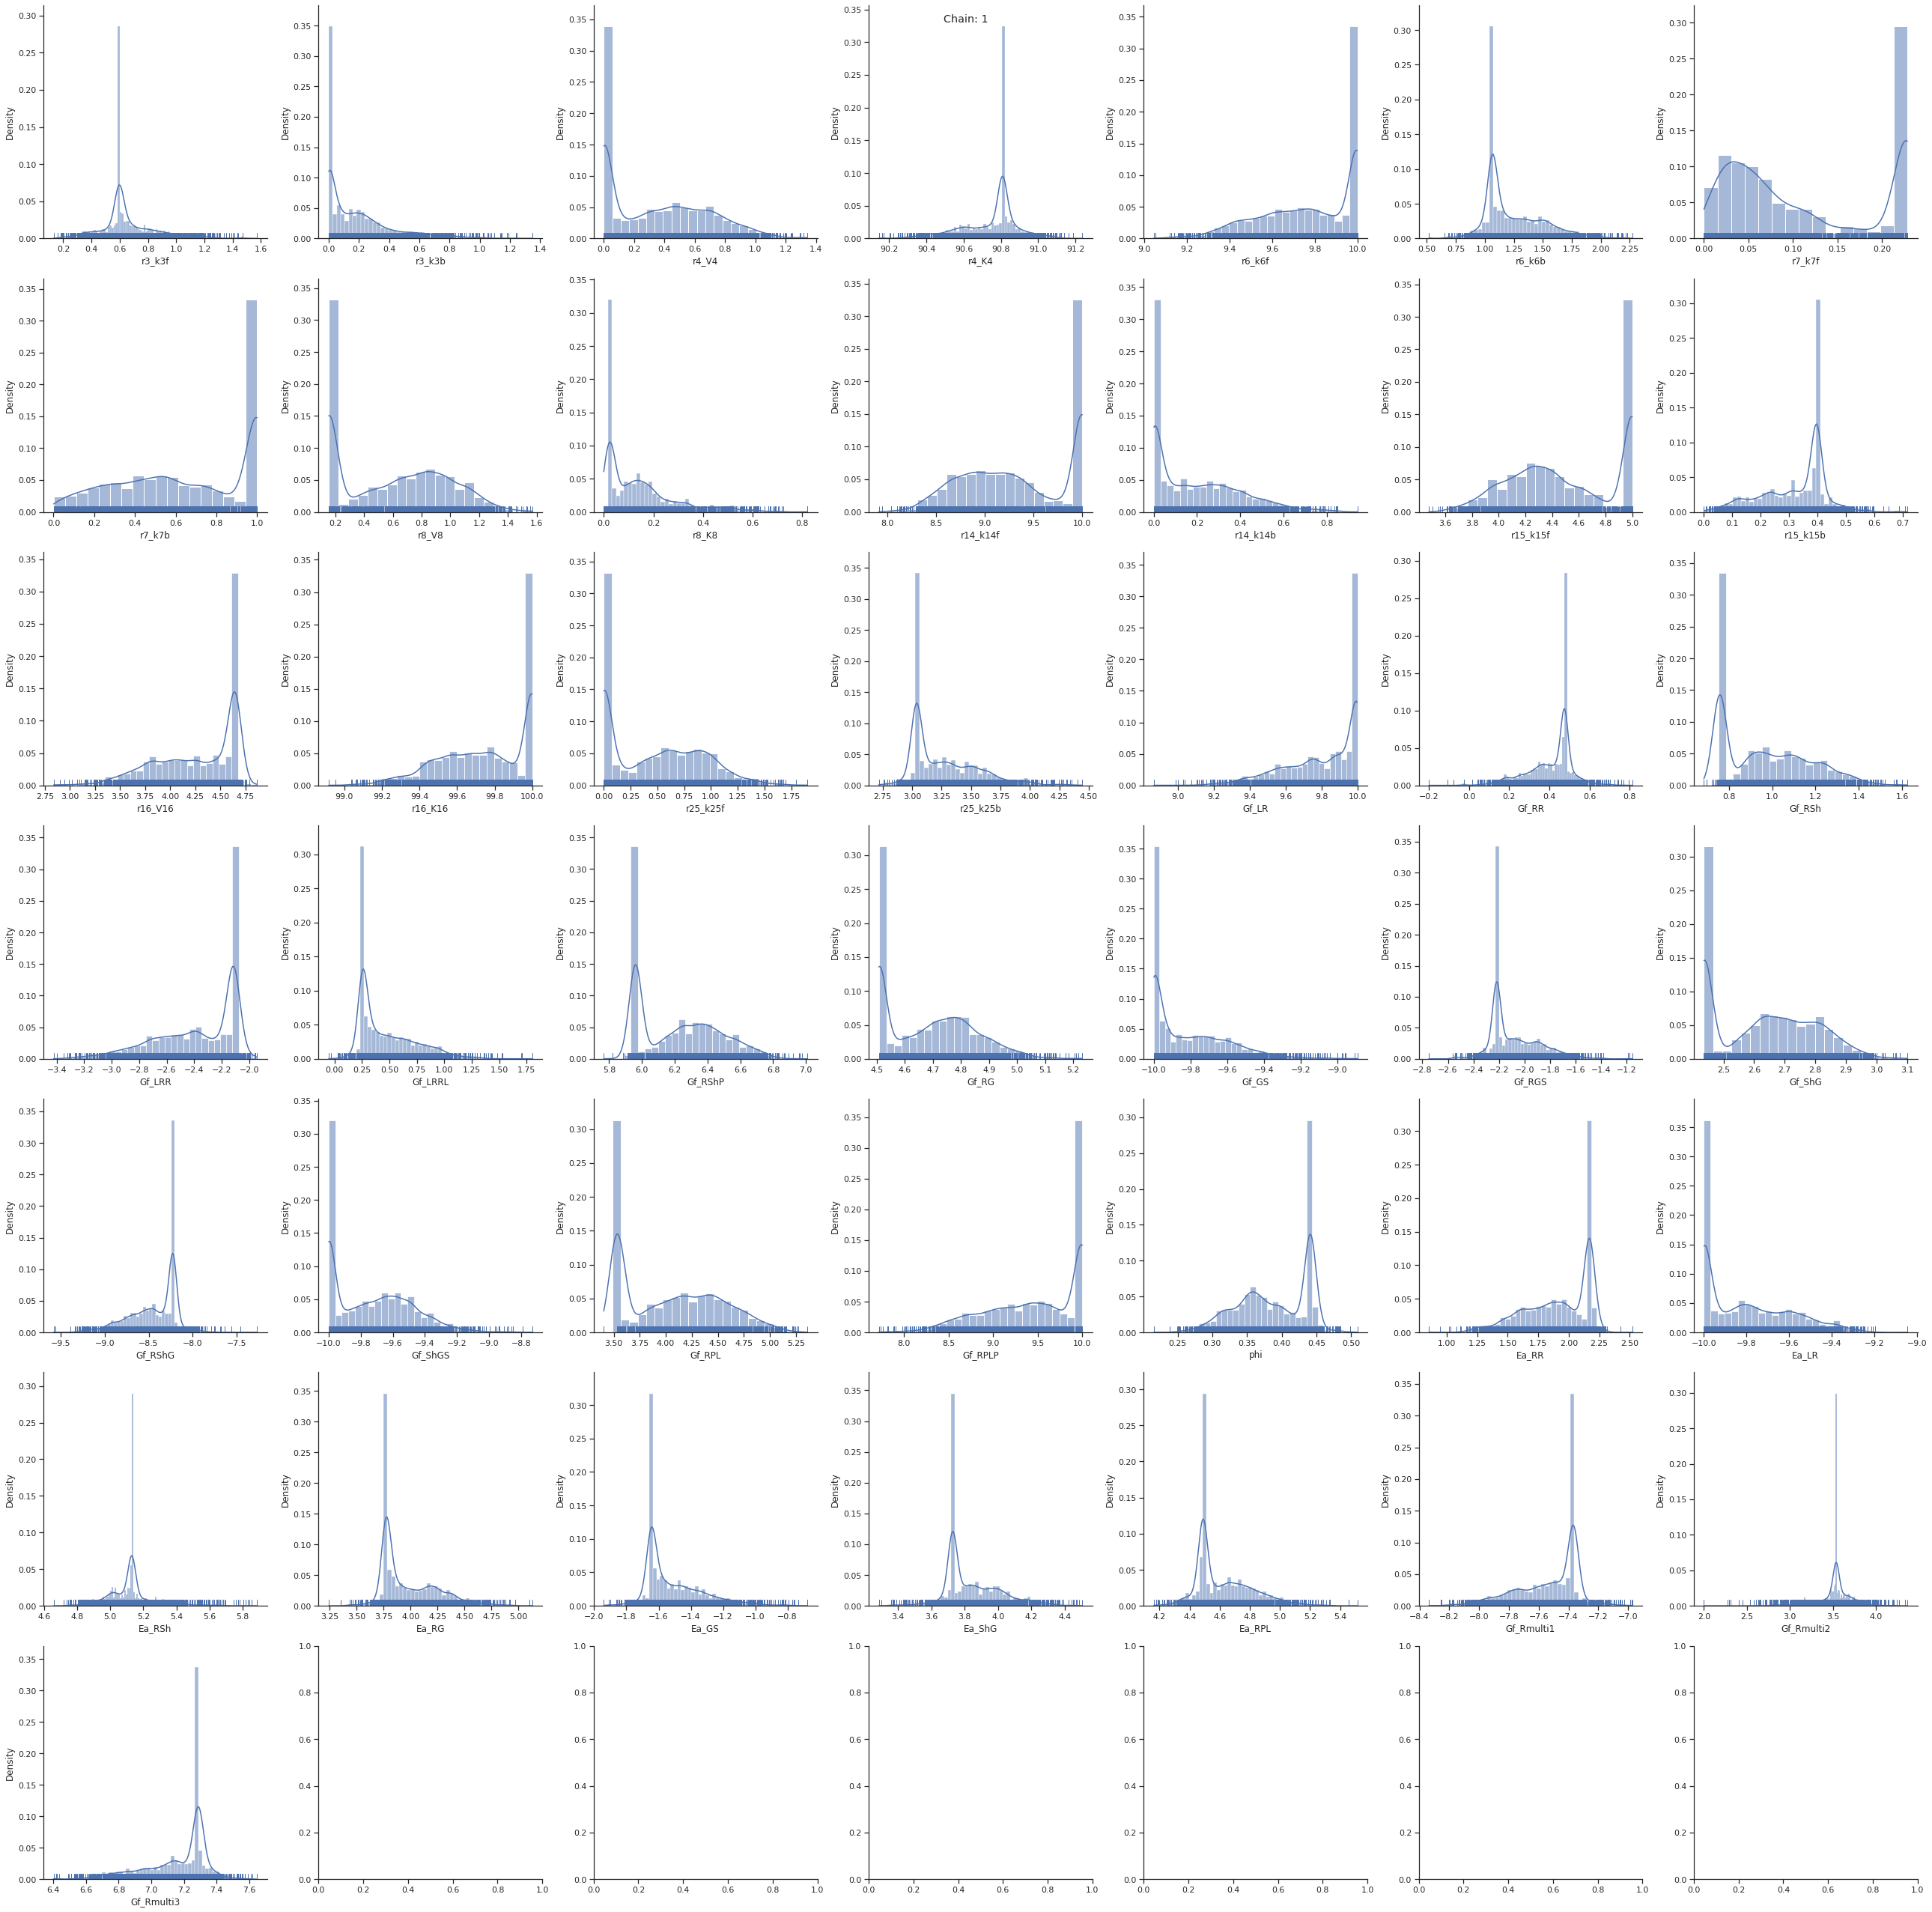

In [14]:
for i_chain in range(len(result.sample_result.betas)):
    visualize.sampling_1d_marginals(
        result, i_chain=i_chain, suptitle=f"Chain: {i_chain}", size=(36,36)
    )

# Kai's Model Output

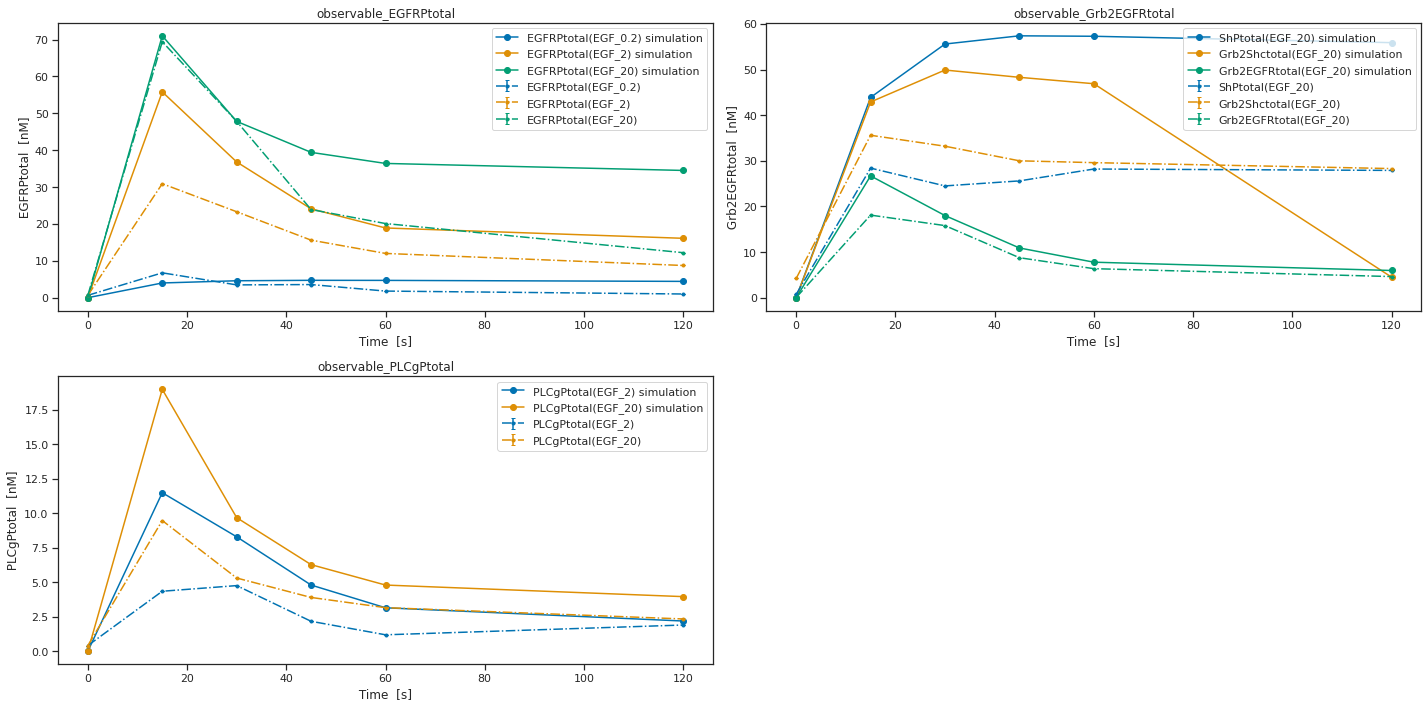

In [29]:
folder = "EGFR/"     #state the exact folder contains .tsv files

data_file_path = folder + "measurementData_EGFR.tsv"
condition_file_path = folder + "experimentalCondition_EGFR.tsv"
visualization_file_path2 = folder + "visualizationSpecification_EGFR.tsv"
simulation_file_path = folder + "simulatedData_EGFR_Kai.tsv"
pp2=petab.visualize.plot_petab_problem(
  petab_problem,
  simulation_file_path,
  data_file_path
)


# Kholodenko's Model Output

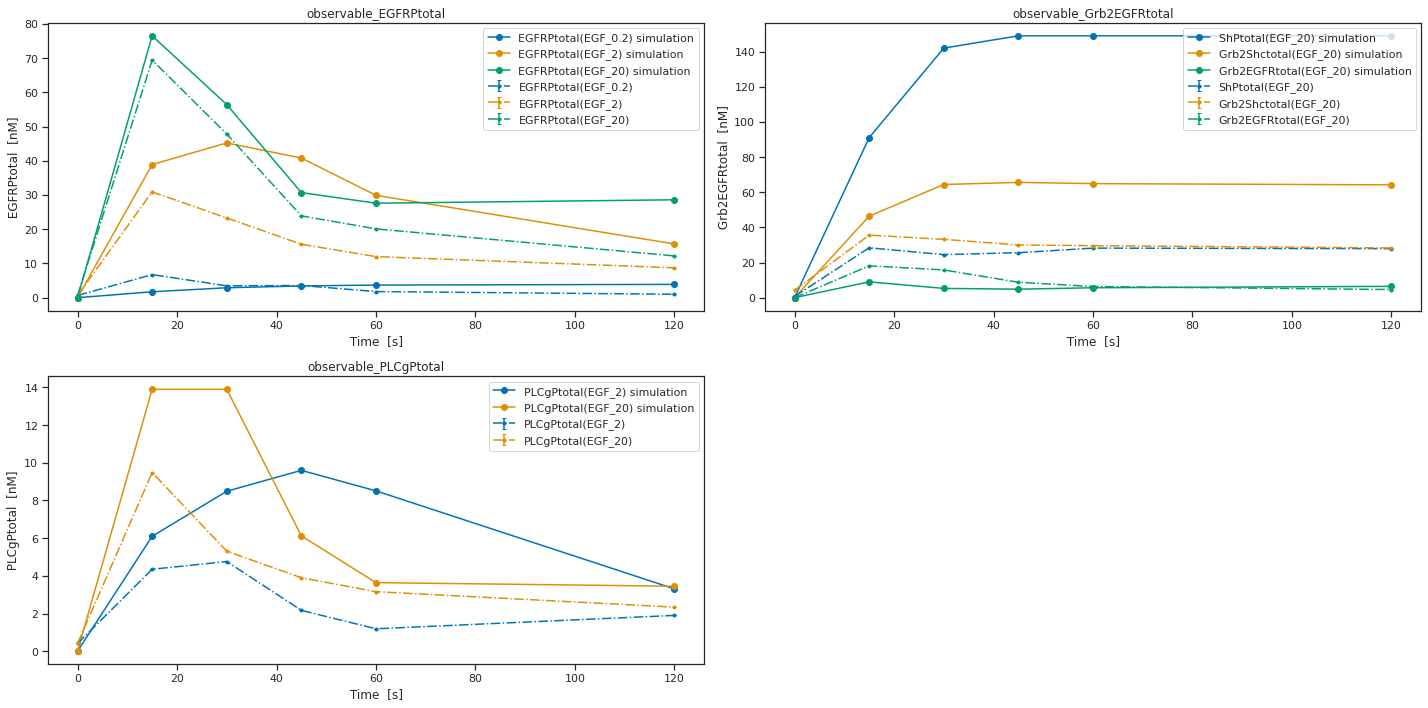

In [27]:
folder = "EGFR/"     #state the exact folder contains .tsv files

data_file_path = folder + "measurementData_EGFR.tsv"
condition_file_path = folder + "experimentalCondition_EGFR.tsv"
visualization_file_path2 = folder + "visualizationSpecification_EGFR.tsv"
simulation_file_path = folder + "simulatedData_EGFR_Kholo.tsv"
pp2=petab.visualize.plot_petab_problem(
  petab_problem,
  simulation_file_path,
  data_file_path
)
